# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
restaurant = pd.read_csv('restaurant.csv')
restaurant

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


# Cleaning Data

In [ ]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
restaurant.describe()

,Price
count,1000.00000
mean,12.81801
std,7.41713
min,2.01000
25%,4.86750
50%,12.53500
75%,17.69000
max,29.84000


In [ ]:
restaurant.isnull().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

In [ ]:
restaurant.duplicated().sum()

27

In [ ]:
restaurant['Ingredients'] = restaurant['Ingredients'].astype(str)

In [ ]:
#restaurant['Ingredients'] = restaurant['Ingredients'].str.replace(' ', '')
#restaurant['Ingredients'] = restaurant['Ingredients'].str.replace("'", '')
restaurant['Ingredients'] = restaurant['Ingredients'].apply(lambda x: x.replace('[', ''))
restaurant['Ingredients'] = restaurant['Ingredients'].apply(lambda x: x.replace(']', ''))
#restaurant['Ingredients'] = restaurant['Ingredients'].apply(lambda x: x.split(','))
#restaurant = restaurant.explode('Ingredients')

In [ ]:
restaurant.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,'confidential',2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"'Tomatoes', 'Basil', 'Garlic', 'Olive Oil'",11.12,Medium
2,R003,Desserts,New York Cheesecake,"'Chocolate', 'Butter', 'Sugar', 'Eggs'",18.66,High
3,R003,Main Course,Chicken Alfredo,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",29.55,High
4,R002,Main Course,Grilled Steak,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",17.73,Medium


In [ ]:
restaurant.duplicated().sum()

27

In [ ]:
restaurant.drop_duplicates(inplace=True)

In [ ]:
restaurant.duplicated().sum()

0

In [ ]:
restaurant.isnull().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

In [ ]:
restaurant.isna().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

In [ ]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   973 non-null    object 
 1   MenuCategory   973 non-null    object 
 2   MenuItem       973 non-null    object 
 3   Ingredients    973 non-null    object 
 4   Price          973 non-null    float64
 5   Profitability  973 non-null    object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


# **Analysis Data**

In [ ]:
restaurant.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,'confidential',2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"'Tomatoes', 'Basil', 'Garlic', 'Olive Oil'",11.12,Medium
2,R003,Desserts,New York Cheesecake,"'Chocolate', 'Butter', 'Sugar', 'Eggs'",18.66,High
3,R003,Main Course,Chicken Alfredo,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",29.55,High
4,R002,Main Course,Grilled Steak,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",17.73,Medium


# 1. Hitunglah total penjualan (Price) untuk setiap kategori menu (MenuCategory).

In [ ]:
category_menu = restaurant.groupby('MenuCategory')['Price'].sum()
category_menu

MenuCategory
Appetizers     2842.37
Beverages       869.30
Desserts       3788.57
Main Course    5115.65
Name: Price, dtype: float64

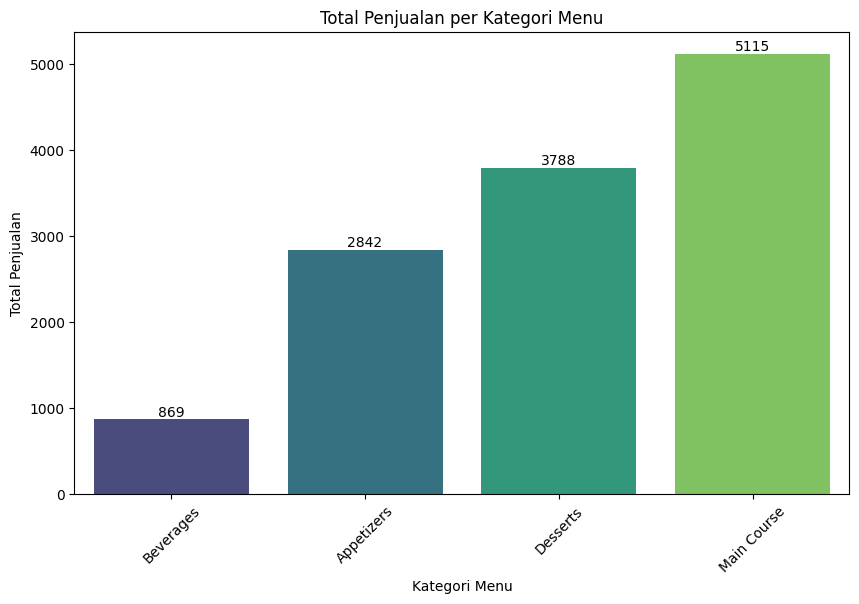

In [ ]:
category_menu_sorted = category_menu.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_menu_sorted.index, y=category_menu_sorted.values, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.title('Total Penjualan per Kategori Menu')
plt.xlabel('Kategori Menu')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

# Temukan item menu dengan keuntungan tertinggi di setiap kategori menu.

In [ ]:
max_profit = restaurant.loc[restaurant.groupby('MenuCategory')['Price'].idxmax()].sort_values(by='Price', ascending=True)
max_profit

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
645,R001,Beverages,Coffee,'confidential',4.99,Medium
550,R001,Appetizers,Bruschetta,"'Tomatoes', 'Basil', 'Garlic', 'Olive Oil'",14.95,High
177,R002,Desserts,New York Cheesecake,"'Chocolate', 'Butter', 'Sugar', 'Eggs'",19.96,High
406,R003,Main Course,Chicken Alfredo,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",29.84,High


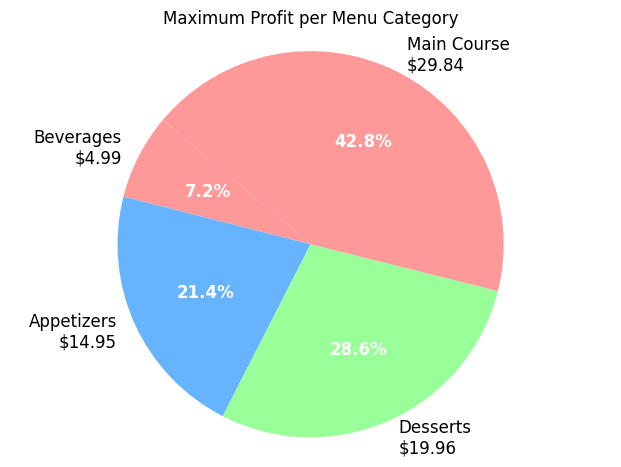

In [ ]:
patches, texts, autotexts = plt.pie(max_profit['Price'], labels=max_profit['MenuCategory'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})

# Add price values as text on each slice
for text, autotext, category, price in zip(texts, autotexts, max_profit['MenuCategory'], max_profit['Price']):
    text.set_fontsize(12)  # Set label font size
    autotext.set_fontsize(12)  # Set percentage font size
    autotext.set_color('white')  # Set percentage color to white
    autotext.set_fontweight('bold')  # Set percentage font weight
    text.set_text(f'{category}\n${price:.2f}')  # Display category and price

plt.title('Maximum Profit per Menu Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Hitung jumlah item menu yang memiliki harga di atas rata-rata harga di setiap restoran.

In [ ]:
mean_price_per_restaurant = restaurant.groupby('RestaurantID')['Price'].mean()
above_avg_items_per_restaurant = restaurant[restaurant.apply(lambda row: row['Price'] > mean_price_per_restaurant[row['RestaurantID']], axis=1)]
count_above_avg_items_per_restaurant = above_avg_items_per_restaurant.groupby('RestaurantID').size()
print(count_above_avg_items_per_restaurant)

RestaurantID
R001    170
R002    147
R003    156
dtype: int64


#  Hitung rata-rata profitabilitas untuk setiap kategori menu di setiap restoran.

In [ ]:
avg_profitability_per_category = restaurant.groupby(['RestaurantID', 'MenuCategory'])['Price'].mean()
avg_profitability_per_category

RestaurantID  MenuCategory
R001          Appetizers      11.433368
              Beverages        3.535402
              Desserts        15.291609
              Main Course     22.415541
R002          Appetizers      11.171711
              Beverages        3.354932
              Desserts        14.576471
              Main Course     22.743210
R003          Appetizers      11.781169
              Beverages        3.600114
              Desserts        15.051852
              Main Course     23.401449
Name: Price, dtype: float64

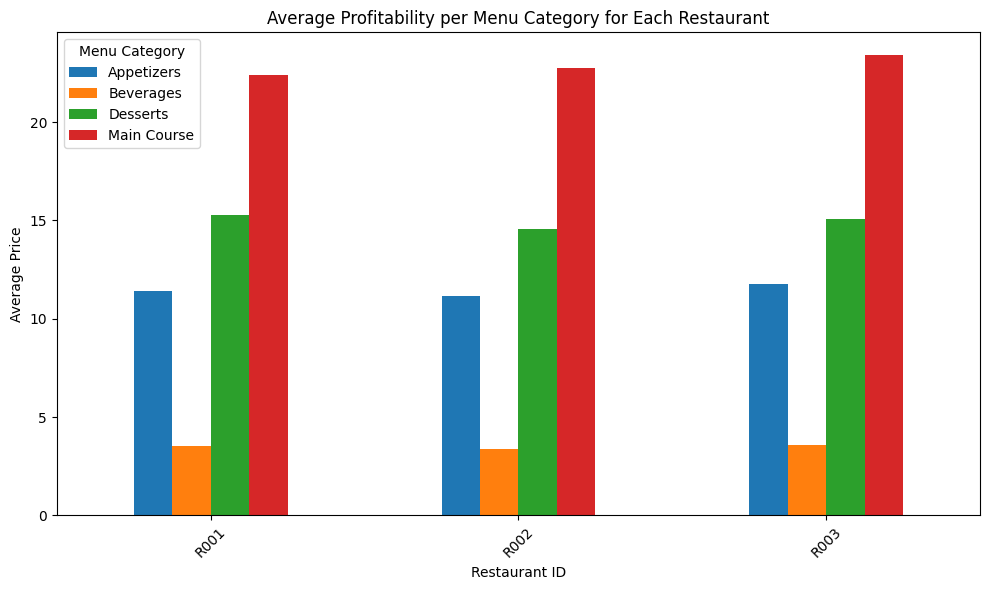

In [ ]:
# prompt: avg_profitability_per_category = restaurant.groupby(['RestaurantID', 'MenuCategory'])['Price'].mean()
# avg_profitability_per_category make are chart

import matplotlib.pyplot as plt
avg_profitability_per_category = restaurant.groupby(['RestaurantID', 'MenuCategory'])['Price'].mean()

# Create a bar chart to visualize the average profitability per category for each restaurant
avg_profitability_per_category.unstack().plot(kind='bar', figsize=(10, 6))

# Add title, axis labels, and legend
plt.title('Average Profitability per Menu Category for Each Restaurant')
plt.xlabel('Restaurant ID')
plt.ylabel('Average Price')
plt.legend(title='Menu Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure tight layout to prevent clipping of labels

# Display the chart
plt.show()


# Temukan restoran yang memiliki total profitabilitas tertinggi.

In [ ]:
total_profitability_per_restaurant = restaurant.groupby('RestaurantID')['Price'].sum().sort_values(ascending=True)
total_profitability_per_restaurant

RestaurantID
R003    4057.86
R002    4175.16
R001    4382.87
Name: Price, dtype: float64

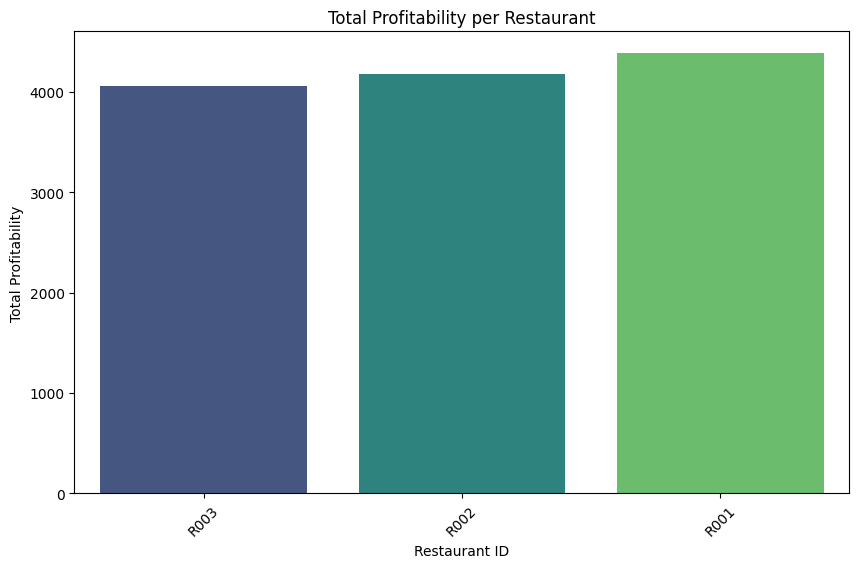

In [ ]:
# prompt: plt.figure(figsize=(10, 6))
# sns.barplot(x=total_profitability_per_restaurant.index, y=total_profitability_per_restaurant.values, palette='viridis',  ) there are numbers

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=total_profitability_per_restaurant.index, y=total_profitability_per_restaurant.values, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.title('Total Profitability per Restaurant')
plt.xlabel('Restaurant ID')
plt.ylabel('Total Profitability')
plt.xticks(rotation=45)
plt.show()


# Hitung jumlah item menu unik (berdasarkan nama) di setiap kategori menu.

In [ ]:
unique_menu_items_per_category = restaurant.groupby('MenuCategory')['MenuItem'].nunique()
unique_menu_items_per_category

MenuCategory
Appetizers     4
Beverages      4
Desserts       4
Main Course    4
Name: MenuItem, dtype: int64

# Buat daftar item menu yang mengandung bahan tertentu (misalnya "Chicken").

In [ ]:
# prompt: chicken_items = restaurant[restaurant['Ingredients'].str.contains('Chicken', case=False)]
# chicken_items, sort by Profitability

chicken_items = restaurant[restaurant['Ingredients'].str.contains('Chicken', case=False)]
chicken_items_sorted = chicken_items.sort_values('Price', ascending=False)
chicken_items_sorted


,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
406,R003,Main Course,Chicken Alfredo,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",29.84,High
343,R002,Main Course,Vegetable Stir-Fry,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",29.78,High
81,R002,Main Course,Grilled Steak,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",29.68,High
495,R003,Main Course,Shrimp Scampi,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",29.64,High
628,R003,Main Course,Grilled Steak,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",29.63,High
...,...,...,...,...,...,...
907,R003,Main Course,Shrimp Scampi,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",15.35,Medium
832,R001,Main Course,Chicken Alfredo,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",15.19,Medium
480,R001,Main Course,Vegetable Stir-Fry,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",15.15,Medium
858,R001,Main Course,Chicken Alfredo,"'Chicken', 'Fettuccine', 'Alfredo Sauce', 'Par...",15.11,Medium


# Hitung total pendapatan (Price) dan total profitabilitas untuk setiap restoran.

In [ ]:
total_revenue_per_restaurant = restaurant.groupby('RestaurantID').agg({'Price': 'sum', 'Price': 'sum'})
total_revenue_per_restaurant

,Price
RestaurantID,
R001,4382.87
R002,4175.16
R003,4057.86


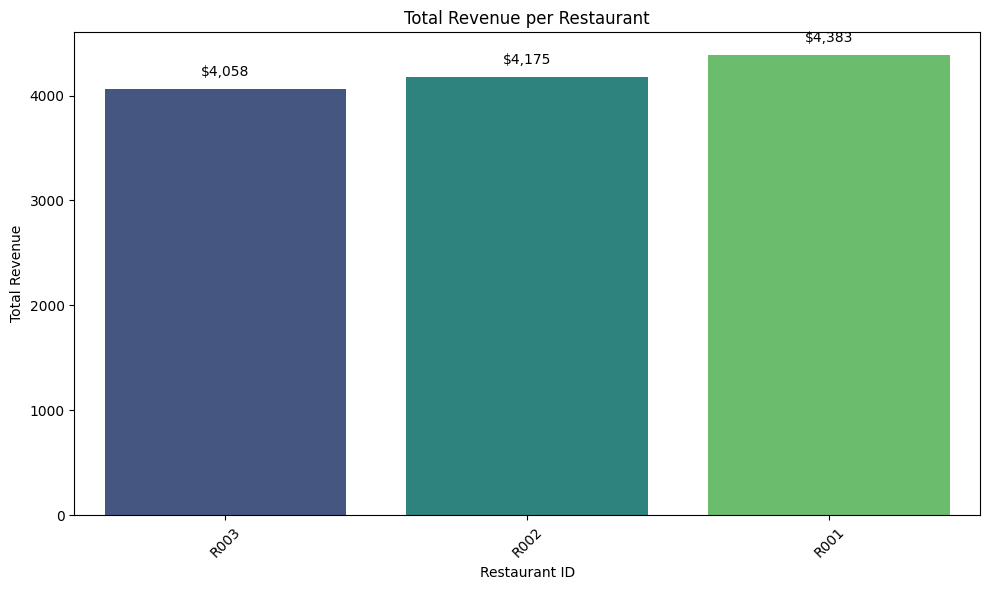

In [ ]:
total_revenue_per_restaurant = total_revenue_per_restaurant.sort_values(by='Price', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='RestaurantID', y='Price', data=total_revenue_per_restaurant, palette='viridis')

# Annotate each bar with its total revenue value
for index, row in total_revenue_per_restaurant.iterrows():
    plt.text(index, row['Price'] + 100, f'${row["Price"]:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Total Revenue per Restaurant')
plt.xlabel('Restaurant ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures tight layout to prevent clipping of labels
plt.show()

# Temukan kategori menu yang paling menguntungkan (dengan total profitabilitas tertinggi) di seluruh restoran.

In [ ]:
total_profitability_per_category = restaurant.groupby('MenuCategory')['Price'].sum().sort_values(ascending=True)
most_profitable_category = total_profitability_per_category.idxmax()
print(f'Kategori menu paling menguntungkan adalah: {most_profitable_category}')


Kategori menu paling menguntungkan adalah: Main Course


# Download CSV

In [ ]:
restaurant = pd.DataFrame(restaurant)

# Simpan DataFrame ke CSV
restaurant.to_csv('Restaurant Recipes Fix.csv', index=False)